In [ ]:
import numpy as np

In [ ]:
# create err_x as a linspace from 0 to 2
err_x = np.linspace(0, 2, 100)

In [ ]:
reward = 1.0 - np.clip(err_x, 0, 2)*0.5
reward -= np.clip(np.log(err_x+1)*5, 0, 1)*0.1 # for 0.2
reward -= np.clip(np.log(err_x+1)*10, 0, 1)*0.1 # for 0.1
reward -= np.clip(np.log(err_x+1)*20, 0, 1)*0.1 # for 0.05
reward -= np.clip(np.log(err_x+1)*50, 0, 1)*0.1 # for 0.02

In [ ]:
# plot reward
import matplotlib.pyplot as plt
plt.plot(err_x, reward)
# add labels
plt.xlabel('err_x')
plt.ylabel('reward')

In [ ]:
import torch
from icecream import ic
import matplotlib.pyplot as plt

In [ ]:
'''
create a function with is the output of a set of three-order polynomial function
the input dimension is input_dim 
the output dimension is output_dim
'''
input_dim = 4
output_dim = 2
seed = 0
# create a random matrix with shape (input_dim, output_dim)
# the values are from a uniform distribution between -1 and 1
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
# create a function
def f(x):
    matrix = torch.rand((output_dim, input_dim,input_dim))*2-1
    vector = torch.rand((output_dim))*2-1
    # x:Tensor(batch_size, input_dim) y:Tensor(batch_size, output_dim)
    # quadratic function
    y = vector + torch.einsum('bi,oij,bj->bo', x, matrix, x)
    return y/input_dim

In [ ]:
# generate input signal as input_dim number of sin signal with different frequncy and phase 
input_signal = torch.zeros((100, input_dim))
for i in range(input_dim):
    input_signal[:,i] = torch.sin(torch.linspace(0, 2*torch.pi, 100)*(i+1) + torch.rand(1)*torch.pi)
output = f(input_signal)

In [ ]:
import torch
seed=0
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
print(torch.rand(1))
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
print(torch.rand(1))

Text(0, 0.5, 'f2')

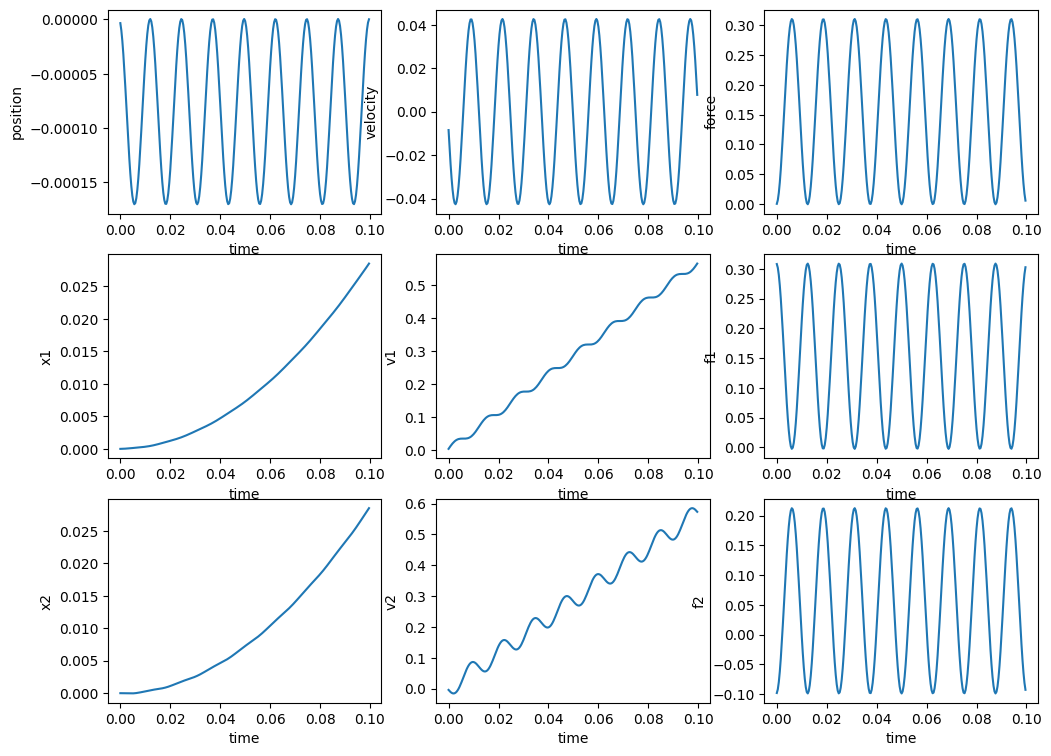

In [29]:
import numpy as np

# create a Mass-spring-damper model

# define the parameters
g = 9.81
m1 = 0.027 # mass
m2 = 0.01
m = (m1*m2)/(m1+m2)
rope_zeta = 0.0
rope_wn = 500
dt = 4e-4

x1 = 0.0
v1 = 0.0
x2 = 0.0
v2 = 0.0
xr = x2 - x1
vr = v2 - v1

x1s = []
v1s = []
f1s = []
x2s = []
v2s = []
f2s = []
xs = []
vs = []
fs = []
ts = []

for i in range(int(0.1/(4e-4))):
    if i % int(0.1/4e-4) == 0:
        thrust = 0.6 * np.random.rand()
    t = i * dt
    fr = np.clip(m * ( - (rope_wn ** 2) * xr - 2 * rope_zeta * rope_wn * vr), -20, 20)
    f1 = - m1 * g - fr + thrust
    f2 = - m2 * g + fr
    a1 = f1 / m1
    a2 = f2 / m2
    v1 += a1 * dt
    v2 += a2 * dt
    x1 += v1 * dt
    x2 += v2 * dt
    xr = x2 - x1
    vr = v2 - v1
    xs.append(xr)
    vs.append(vr)
    fs.append(fr)
    ts.append(t)
    x1s.append(x1)
    v1s.append(v1)
    f1s.append(f1)
    x2s.append(x2)
    v2s.append(v2)
    f2s.append(f2)

import matplotlib.pyplot as plt
# plot the result in 6 subplots
plt.figure(figsize=(12, 9))
plt.subplot(3, 3, 1)
plt.plot(ts, xs)
plt.xlabel('time')
plt.ylabel('position')
plt.subplot(3, 3, 2)
plt.plot(ts, vs)
plt.xlabel('time')
plt.ylabel('velocity')
plt.subplot(3, 3, 3)
plt.plot(ts, fs)
plt.xlabel('time')
plt.ylabel('force')
plt.subplot(3, 3, 4)
plt.plot(ts, x1s)
plt.xlabel('time')
plt.ylabel('x1')
plt.subplot(3, 3, 5)
plt.plot(ts, v1s)
plt.xlabel('time')
plt.ylabel('v1')
plt.subplot(3, 3, 6)
plt.plot(ts, f1s)
plt.xlabel('time')
plt.ylabel('f1')
plt.subplot(3, 3, 7)
plt.plot(ts, x2s)
plt.xlabel('time')
plt.ylabel('x2')
plt.subplot(3, 3, 8)
plt.plot(ts, v2s)
plt.xlabel('time')
plt.ylabel('v2')
plt.subplot(3, 3, 9)
plt.plot(ts, f2s)
plt.xlabel('time')
plt.ylabel('f2')

Int64Index([766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778,
            779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791,
            792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804,
            805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817,
            818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
            831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
            844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856,
            857, 858, 859, 860],
           dtype='int64')


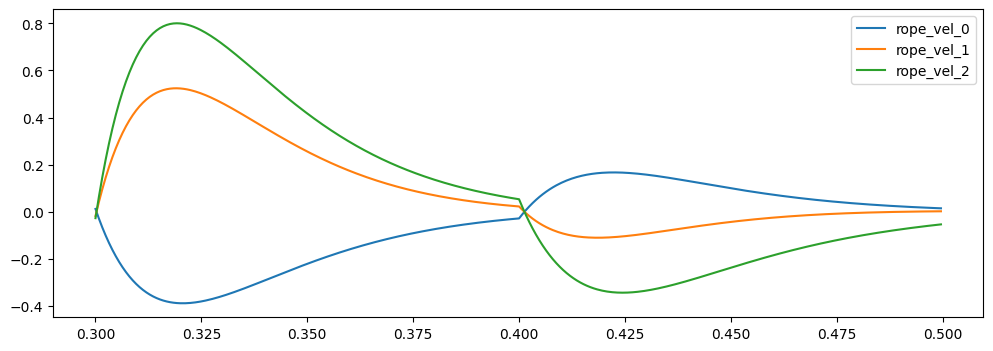

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# load csv data
df = pd.read_csv('/home/pcy/rl/policy-adaptation-survey/adaptive_control_gym/envs/results/test.csv')[750:750+500]

# plot the row rope_vel_0, rope_vel_1, rope_vel_2 respect to time in a single plot
plt.figure(figsize=(12, 4))
plt.plot(df['time'], df['rope_vel_0'], label='rope_vel_0')
plt.plot(df['time'], df['rope_vel_1'], label='rope_vel_1')
plt.plot(df['time'], df['rope_vel_2'], label='rope_vel_2')
plt.legend()

# get all point index where the rope_vel_2 is larger than 0.5
idx = df[df['rope_vel_2'] > 0.5].index
print(idx)